In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.stats as stats

In [3]:
import pandas as pd

# Change to your absolute path of the dataset
df = pd.read_csv('../data/dataset.csv')

df

,SID,GID,MOT,SCORE,MOT_CAT,SCORE_CAT,PUD,PUD_CAT,FREQ,DUR,TTAll,TTAC,TTAW,TTHard,TTEasy,TTMedium
0,mis-016815,1,1.00,0.88,1,1,1.00,1.0,10.0,909.27,1629.74,1226.790,402.95,745.790,286.53,597.42
1,mis-022158,0,0.44,0.38,0,2,NaN,NaN,NaN,NaN,1380.15,759.237,620.92,566.127,180.02,634.01
2,mis-022814,0,0.73,0.38,1,2,NaN,NaN,NaN,NaN,1214.13,356.139,857.99,404.840,342.50,466.80
3,mis-042515,1,0.72,0.25,1,3,0.62,1.0,8.0,194.14,1867.56,743.290,1124.27,856.780,710.97,299.81
4,mis-058915,1,0.32,0.13,0,3,0.16,0.0,6.0,287.71,1647.23,821.390,825.84,1243.250,177.56,226.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,mis-816254,0,0.33,0.25,0,3,NaN,NaN,NaN,NaN,1222.18,579.047,643.13,521.465,295.88,404.83
126,mis-816514,0,0.33,0.25,0,3,NaN,NaN,NaN,NaN,817.85,271.906,545.95,394.115,59.31,364.43
127,mis-829314,0,0.40,0.25,0,3,NaN,NaN,NaN,NaN,1026.12,440.612,585.51,266.060,427.57,332.50
128,mis-916023,0,0.33,0.13,0,3,NaN,NaN,NaN,NaN,1422.55,529.132,893.41,695.501,547.74,179.31


In [4]:
df_dash = df[df.GID != 0] #Dashboard
df_nodash = df[df.GID != 1] #No dashboard

In [5]:
# Drop unnecessary variables:
df_dash.drop(['GID', 'SID'], axis=1, inplace=True)
df_nodash.drop(['GID', 'SID', 'PUD', 'PUD_CAT', 'FREQ', 'DUR'], axis=1, inplace=True)

/Users/mariu/.local/share/virtualenvs/IT3023--pn8rZbT/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df_dash.describe()

,MOT,SCORE,MOT_CAT,SCORE_CAT,PUD,PUD_CAT,FREQ,DUR,TTAll,TTAC,TTAW,TTHard,TTEasy,TTMedium
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.593485,0.538485,0.636364,1.727273,0.529848,0.409091,10.060606,468.490303,1416.608182,821.930152,594.678030,755.861515,231.403333,429.344091
std,0.219422,0.231465,0.484732,0.755400,0.214902,0.495434,3.378114,256.201538,401.502320,388.824465,289.276035,271.025909,122.488931,171.063067
min,0.120000,0.130000,0.000000,1.000000,0.160000,0.000000,1.000000,101.420000,435.300000,87.980000,94.840000,228.060000,62.980000,99.150000
25%,0.480000,0.380000,0.000000,1.000000,0.390000,0.000000,8.000000,223.327500,1119.357500,577.652500,413.657500,550.727500,140.345000,307.867500
50%,0.600000,0.500000,1.000000,2.000000,0.550000,0.000000,10.000000,454.510000,1435.250000,803.005000,535.670000,757.325000,194.065000,411.190000
75%,0.730000,0.750000,1.000000,2.000000,0.620000,1.000000,12.000000,631.292500,1642.857500,1004.490000,734.940000,943.015000,293.415000,559.165000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,19.000000,991.600000,2392.480000,2056.660000,1389.040000,1256.630000,710.970000,868.610000


In [7]:
df_nodash.describe()

,MOT,SCORE,MOT_CAT,SCORE_CAT,TTAll,TTAC,TTAW,TTHard,TTEasy,TTMedium
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.528438,0.422344,0.359375,2.125000,1256.392500,624.796953,631.595625,523.419844,302.437031,430.536719
std,0.206968,0.222823,0.483610,0.806718,365.893116,298.862673,228.044243,215.690352,140.803822,174.596980
min,0.330000,0.130000,0.000000,1.000000,435.300000,77.192000,97.230000,163.798000,59.310000,70.850000
25%,0.330000,0.250000,0.000000,1.000000,1015.867500,388.096750,464.492500,337.538500,199.340000,317.222500
50%,0.460000,0.380000,0.000000,2.000000,1212.325000,584.932000,627.730000,502.900500,282.930000,414.045000
75%,0.730000,0.630000,1.000000,3.000000,1492.565000,769.262250,782.115000,700.202250,385.950000,540.735000
max,0.880000,0.880000,1.000000,3.000000,2159.630000,1498.259000,1424.410000,974.322000,706.070000,832.780000


In [8]:
# SDs:
#   Dash:   0.219422	0.231465	0.484732	0.755400	401.502320	388.824465	289.276035	271.025909	122.488931	171.063067
# NoDash:	0.206968	0.222823	0.483610	0.806718	365.893116	298.862673	228.044243	215.690352	140.803822	174.596980

In [9]:
# Define alpha-value
alpha = 0.05

In [10]:
# Compare variances to check if equal (for T-tests)
X = df_dash.drop(['PUD', 'PUD_CAT', 'FREQ', 'DUR'], axis=1, inplace=False)
Y = df_nodash

# Two sided F-Test for equal variance or not
F = X.var() / Y.var()
df1 = len(df_dash) - 1
df2 = len(df_nodash) - 1

p_value = 2 * (1 - stats.f.cdf(F, df1, df2))
# print(df_nodash.columns)
print(p_value)

[0.64262935 0.76280646 0.98631545 1.40041215 0.46063648 0.03746014
 0.05974187 0.07054322 1.733267   1.13046063]


In [11]:
# Results from F-test
# ['MOT',       'SCORE', 'MOT_CAT', 'SCORE_CAT', 'TTAll',   'TTAC',     'TTAW', 'TTHard',  'TTEasy', 'TTMedium']
# [0.64262935 0.76280646 0.98631545 1.40041215 0.46063648 0.03746014 0.05974187 0.07054322 1.733267 1.13046063]

# We clearly see that most variables in both samples satisfies this condition (as p-value > alpha).
# However, this is not true for TTAC, and barely for TTAW and TTHARD. Hence, ANOVA will be used on

array([[<AxesSubplot:title={'center':'MOT'}>,
        <AxesSubplot:title={'center':'SCORE'}>,
        <AxesSubplot:title={'center':'MOT_CAT'}>],
       [<AxesSubplot:title={'center':'SCORE_CAT'}>,
        <AxesSubplot:title={'center':'TTAll'}>,
        <AxesSubplot:title={'center':'TTAC'}>],
       [<AxesSubplot:title={'center':'TTAW'}>,
        <AxesSubplot:title={'center':'TTHard'}>,
        <AxesSubplot:title={'center':'TTEasy'}>],
       [<AxesSubplot:title={'center':'TTMedium'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

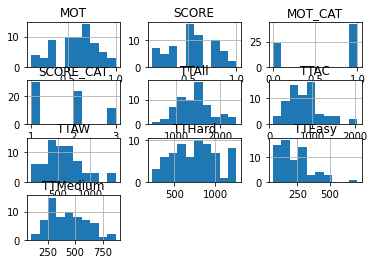

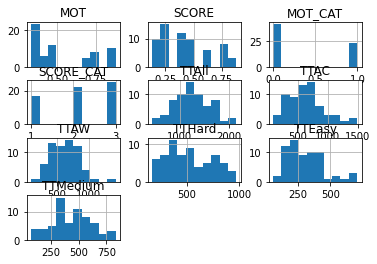

In [12]:
# Testing distributions

X = df_dash.drop(['PUD', 'PUD_CAT', 'FREQ', 'DUR'], axis=1, inplace=False)
Y = df_nodash

X.hist()
# data = np.random.normal(0, 0.5, 1000)

# mean, var  = scipy.stats.distributions.norm.fit(data)

# x = np.linspace(-5,5,100)

# fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

# plt.hist(data, density=True)
# plt.plot(x,fitted_data,'r-')

Y.hist()

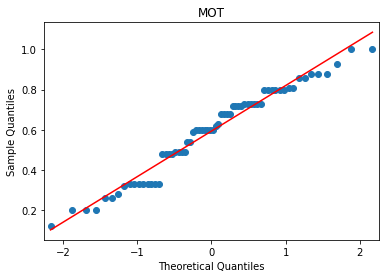

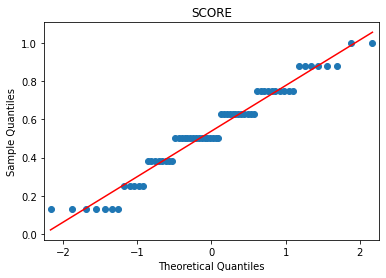

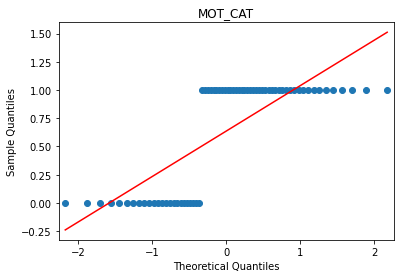

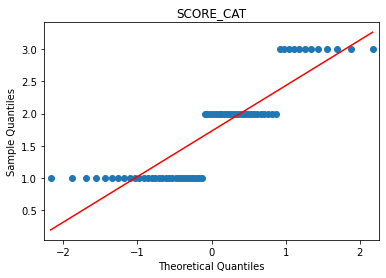

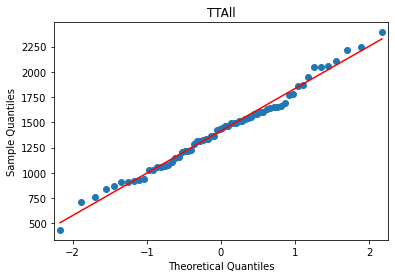

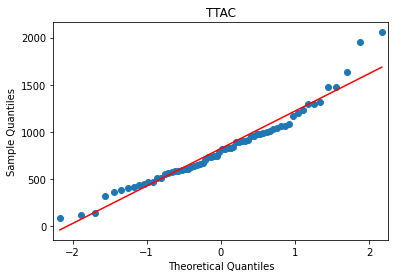

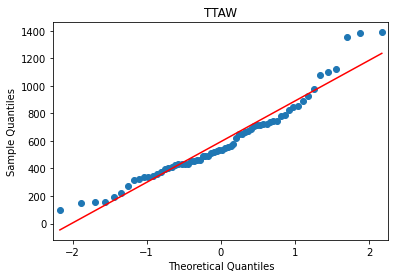

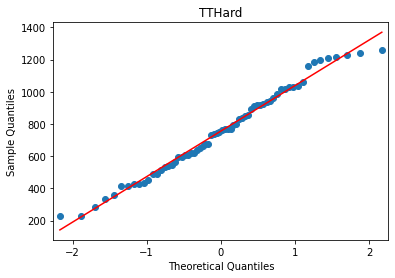

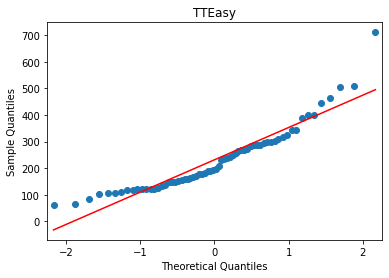

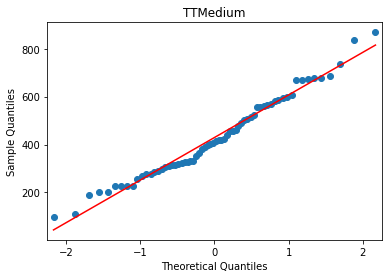

In [41]:
import pylab
import statsmodels

my_data = X

result = [statsmodels.graphics.gofplots.qqplot(my_data[x], line='r') for x in my_data.columns]
for i in range(len(result)):
    result[i].axes[0].set_title(my_data.columns[i])
pylab.show()

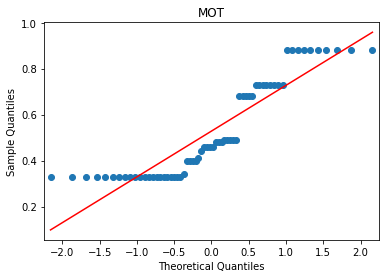

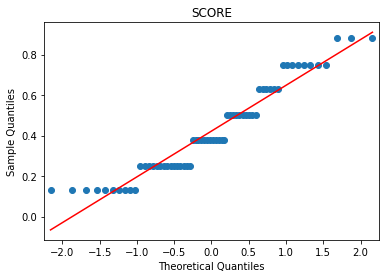

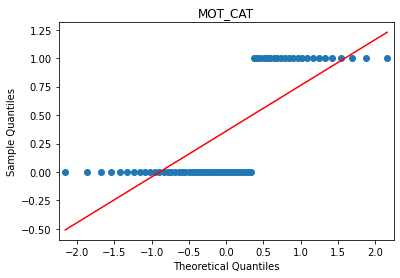

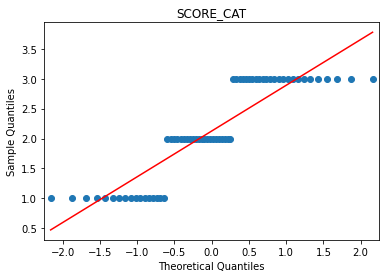

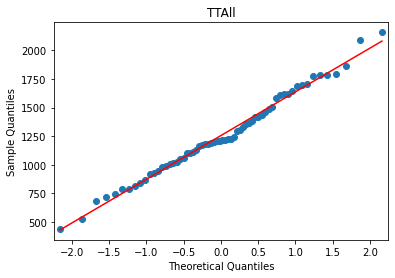

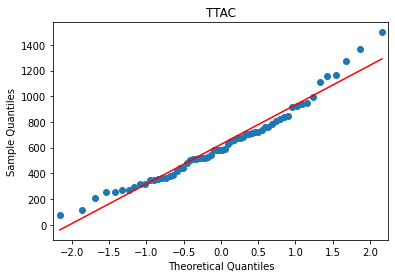

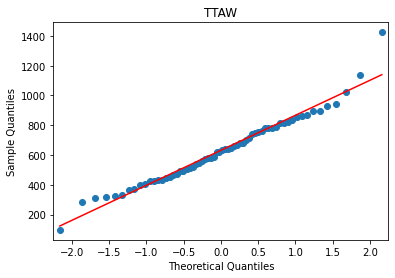

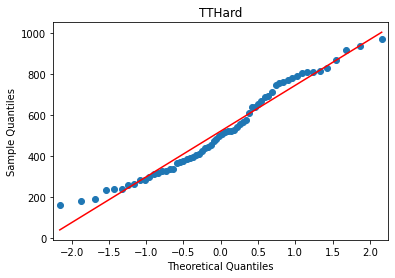

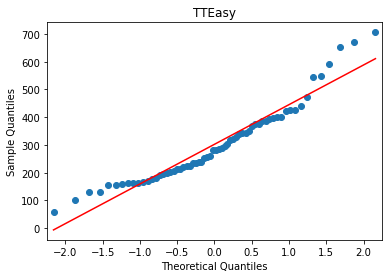

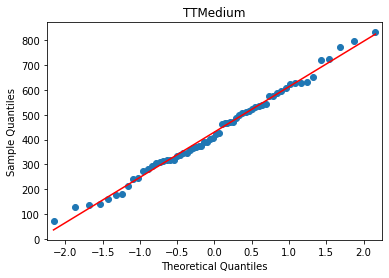

In [42]:
import pylab
import statsmodels

my_data = Y

result = [statsmodels.graphics.gofplots.qqplot(my_data[x], line='r') for x in my_data.columns]
for i in range(len(result)):
    result[i].axes[0].set_title(my_data.columns[i])
pylab.show()